# Diamonds Project
In this project we want to make a model topredict a price of a diamond.

## Import Libraries
Here we import the libraries thats important for preprocessing and visualizations.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data and start preprocessing

In [5]:
diamonds_data = pd.read_csv('diamonds.csv')
diamonds_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Checking for nulls

In [7]:
diamonds_data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

We have no nulls!

### Checking for outliers

In [10]:
diamonds_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


Ways to check if there are an outliers :
* Look at the Min and Max Values -> If min or max values are significantly different from the 25% and 75% quartiles, there might be outliers.
* Compare Mean and Median -> If the mean is far from the median, could be due to outliers.
* Boxplot -> It shows the minimum, first quartile, median , third quartile , and maximum while also plotting outliers as individual points.

#### 1- Look at the Min and Max Values
We can see that there are a big difference between the min and 25% in some features so we may have an outliers.

#### 2- Compare Mean and Median
The difference between mean and median in almost all the features isnt that big so we are not sure that we still have an outliers.

#### 3- Boxplot
Lets make a boxplot for all of the features

##### Encoding
Before drawing a boxplot we need to encode all categorical features , that will not only help us in boxplot it will also help us when start to train the regression model.

In [16]:
#Before encoding
diamonds_data['cut'].unique(),diamonds_data['color'].unique(),diamonds_data['clarity'].unique()

(array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object),
 array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object),
 array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
       dtype=object))

In [17]:
from sklearn.preprocessing import LabelEncoder
cat_features = diamonds_data[['cut','color','clarity']]
encoder = LabelEncoder()
for i in cat_features:
    diamonds_data[i] = encoder.fit_transform(diamonds_data[i])

In [18]:
#After encoding
diamonds_data['cut'].unique(),diamonds_data['color'].unique(),diamonds_data['clarity'].unique()

(array([2, 3, 1, 4, 0]),
 array([1, 5, 6, 4, 2, 3, 0]),
 array([3, 2, 4, 5, 7, 6, 0, 1]))

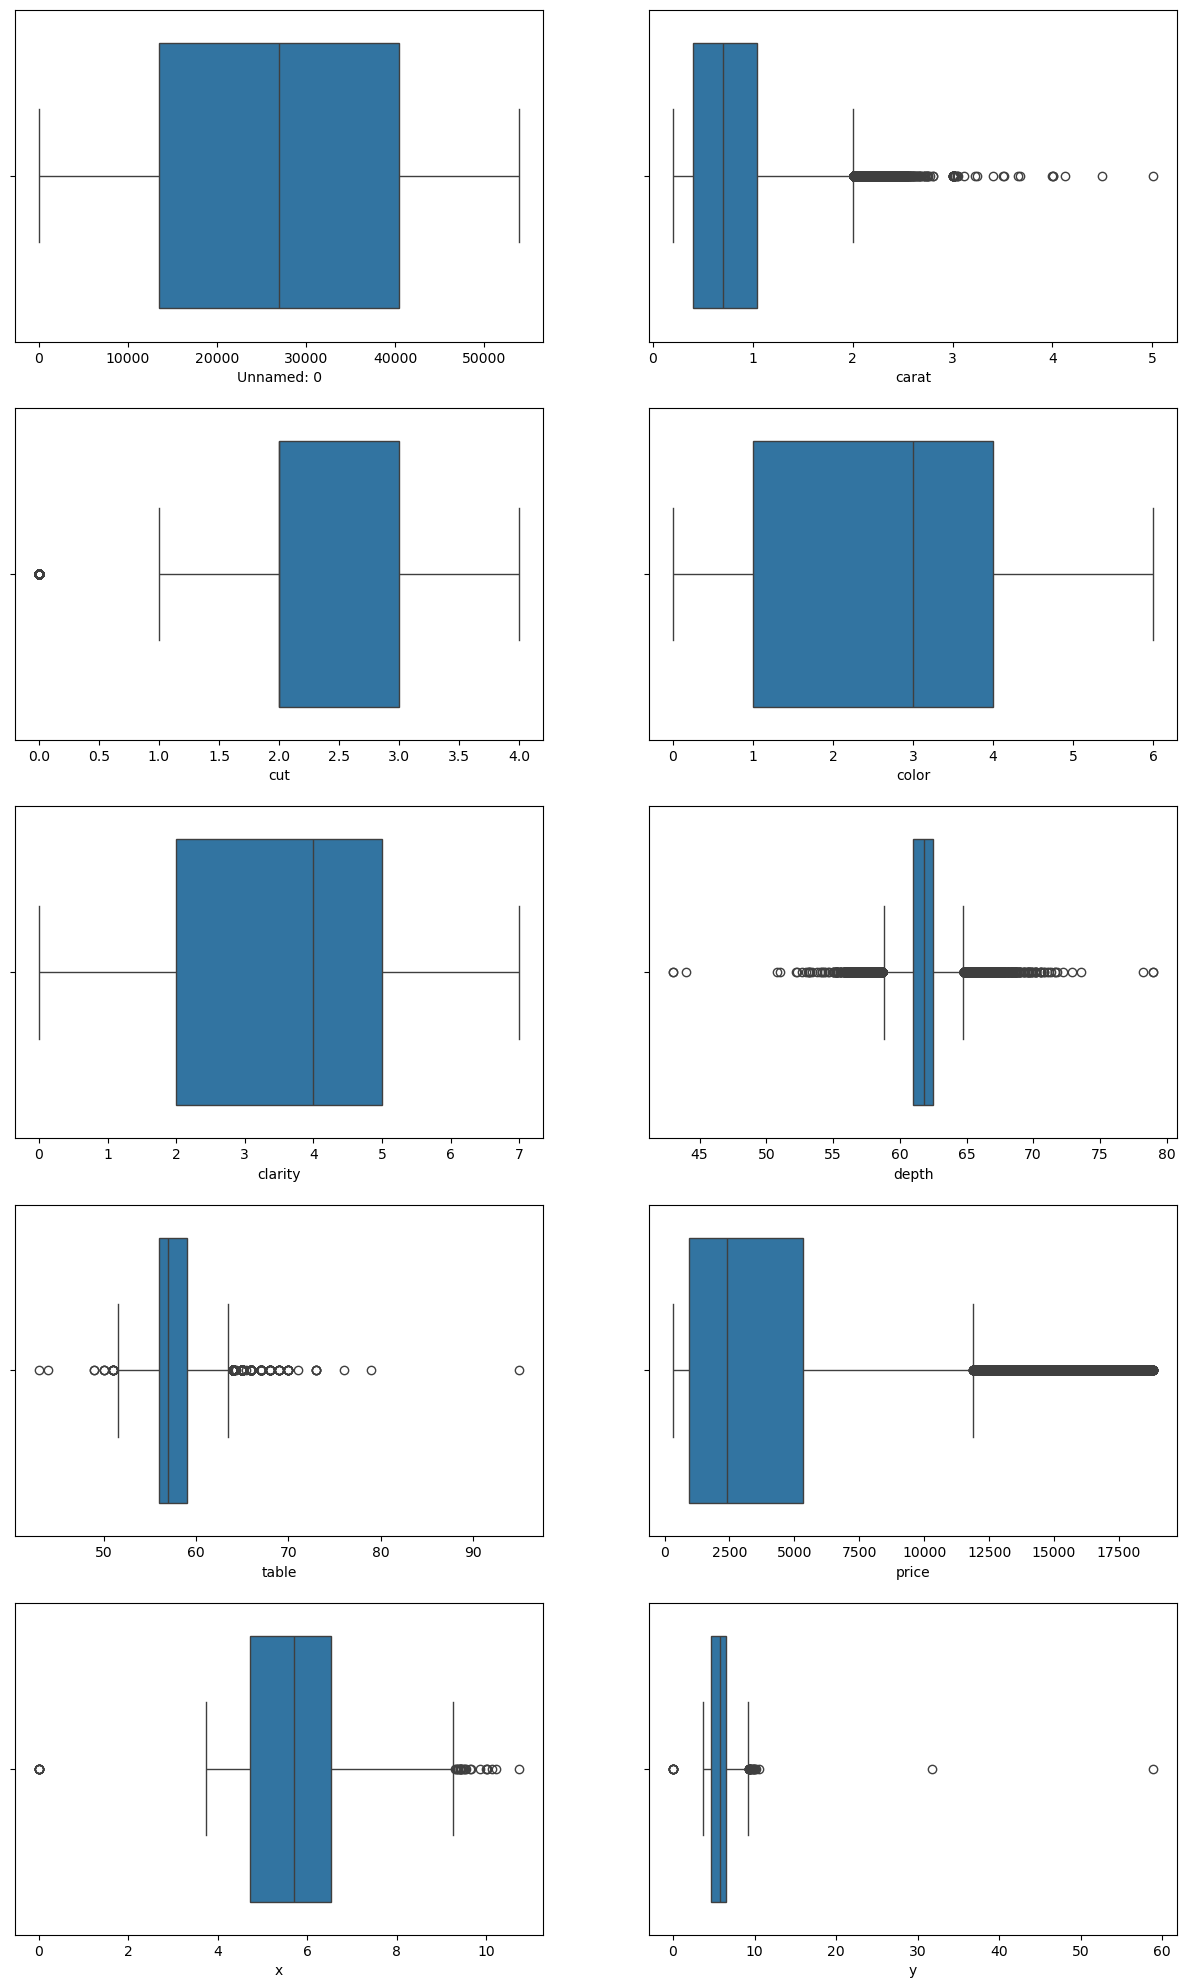

In [19]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
axes = axes.ravel() #i took this from chatgpt :) , because zip function only works with 1d array but axes is 2d so it will give an error so using ravel we change the axes into 1d
for ax, feature in zip(axes, diamonds_data.columns):
    sns.boxplot(x=diamonds_data[feature], ax=ax)

Well after checking about outliers i think that outliers are very important in diamond price detection because they can impact pricing models so theres no need to remove them but i made all of this to just know that there are some unique values :).

### Reduce skewness
At least to make the performace better, we can reduce skewness and compress extreme values to reduce the impact of the outliers.

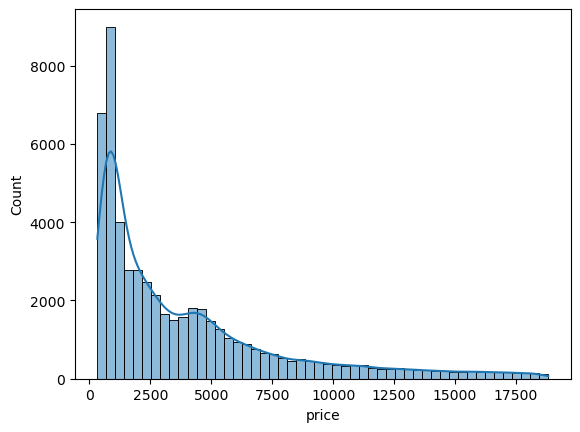

In [22]:
sns.histplot(diamonds_data['price'], bins=50,kde=True)
plt.show()

In [23]:
diamonds_data['log_price'] = np.log(diamonds_data['price'])
diamonds_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,log_price
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,5.786897
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,5.786897
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,5.789960
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,5.811141
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,5.814131


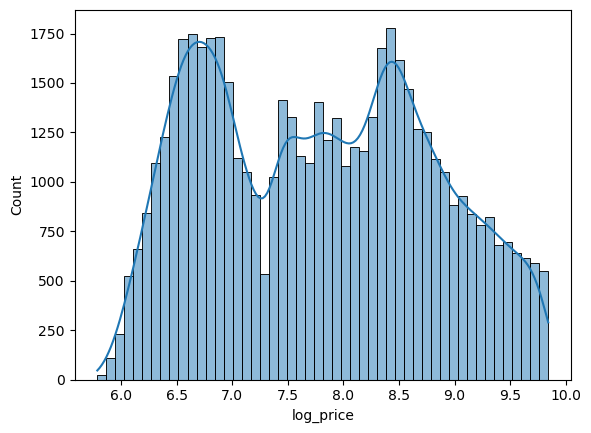

In [24]:
sns.histplot(diamonds_data['log_price'], bins=50,kde=True)
plt.show()

Now its better!

### Some Feature Engineering

In [27]:
diamonds_data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z', 'log_price'],
      dtype='object')

If we looked at the data we can see that not all of them are useful like unnamed column which represents the index number so we can drop it

In [29]:
diamonds_data.drop(columns=['Unnamed: 0'], inplace=True)
diamonds_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,5.786897
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,5.786897
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,5.789960
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,5.811141
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,5.814131


Also we can combine x , y , z into one column and remove the old price feature

In [31]:
diamonds_data['volume'] = diamonds_data['x'] * diamonds_data['y'] * diamonds_data['z']
diamonds_data.drop(columns=['x', 'y', 'z','price'], inplace=True)
diamonds_data.head()

,carat,cut,color,clarity,depth,table,log_price,volume
0,0.23,2,1,3,61.5,55.0,5.786897,38.202030
1,0.21,3,1,2,59.8,61.0,5.786897,34.505856
2,0.23,1,1,4,56.9,65.0,5.789960,38.076885
3,0.29,3,5,5,62.4,58.0,5.811141,46.724580
4,0.31,1,6,3,63.3,58.0,5.814131,51.917250


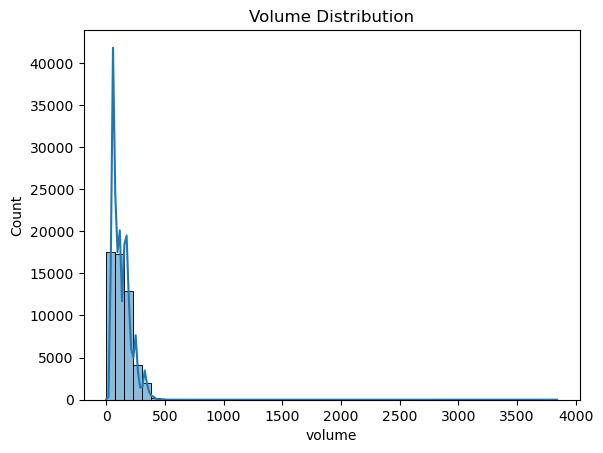

In [32]:
sns.histplot(diamonds_data['volume'], bins=50, kde=True)
plt.title("Volume Distribution")
plt.show()

C:\Users\roqay\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


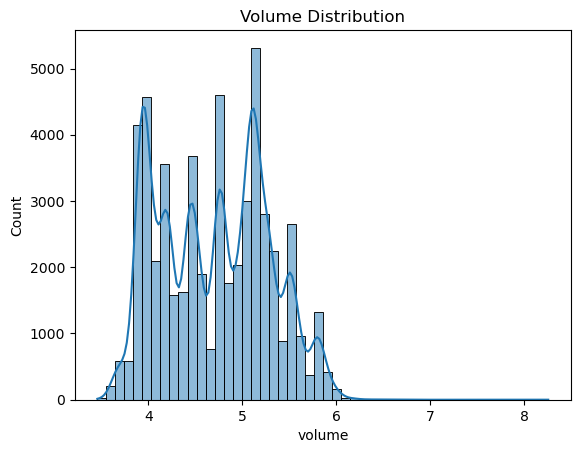

In [33]:
diamonds_data['volume'] = np.log(diamonds_data['volume'])
sns.histplot(diamonds_data['volume'], bins=50, kde=True)
plt.title("Volume Distribution")
plt.show()

Now we made some adjustments to the feature we made!

## Time for training

### I guess we now are ready to train!

### Some visualizations
Lets take some visualizations to choose the model that we will work with.

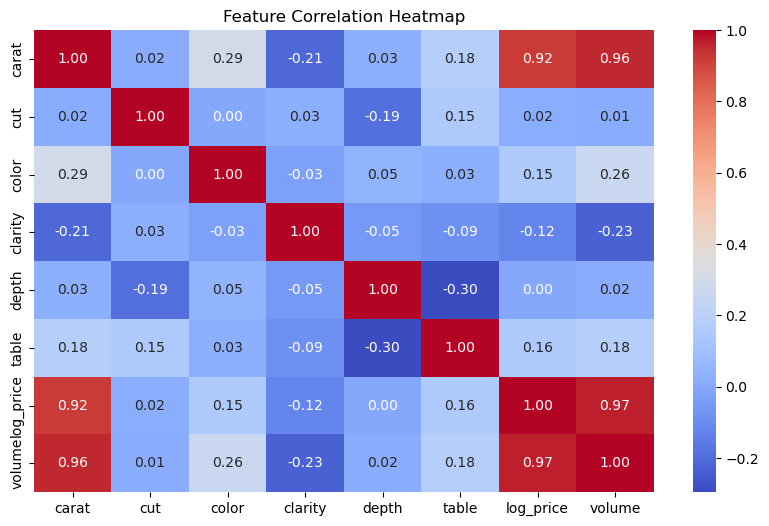

In [38]:
plt.figure(figsize=(10, 6))
sns.heatmap(diamonds_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

As we can see theres a high colleration between price and carat and volume.

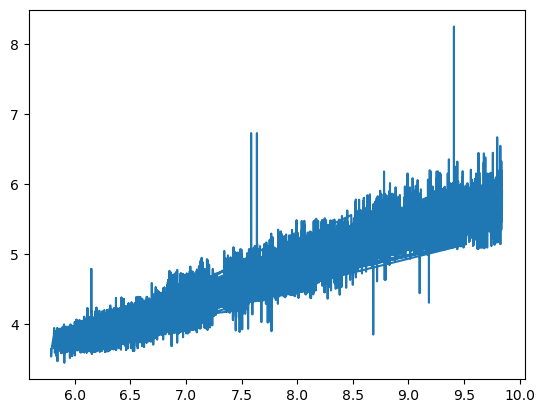

In [40]:
plt.plot(diamonds_data['log_price'],diamonds_data['volume'])
plt.show()

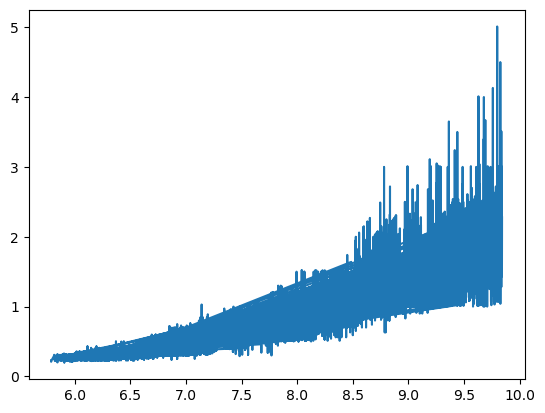

In [41]:
plt.plot(diamonds_data['log_price'],diamonds_data['carat'])
plt.show()

Now we can see a linear relationship!

While looking at the heatmap i can see that there is a high colleration between volume and carat so we can use regularization to avoid overfitting.

In [51]:
from sklearn.model_selection import train_test_split
X = diamonds_data.drop(columns=['log_price'])
y = diamonds_data['log_price']

Lets check for infinity values because it will be a problem.

In [54]:
print("Infinite values:\n", np.isinf(X).sum())

Infinite values:
 carat       0
cut         0
color       0
clarity     0
depth       0
table       0
volume     20
dtype: int64


We have 20 inf values in volume.

In [59]:
X = X.clip(lower=X.quantile(0.01), upper=X.quantile(0.99), axis=1)

I tried to scale the inf values but it gave me an error so to solve that i cap them to avoid scaling issues.

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Now we are ready!

In [64]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled,y,test_size=0.2,random_state = 42)

In [66]:
from sklearn.linear_model import Ridge
model = Ridge(alpha = 0.1)
model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [68]:
y_pred = model.predict(X_test)

In [78]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Ridge Regression Performance:")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Ridge Regression Performance:
Mean Absolute Error: 0.1584
Mean Squared Error: 0.0442
R² Score: 0.9571
